# Preparación de los Datos

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('../datasets/twitter_trump_data.csv')

### Convertir a DataFrame

In [18]:
df = pd.DataFrame(data)

In [19]:
df.head()

,text,retweet_count,favorite_count,Followers,Follower_Change,Num_Tweets,Year,Month,Week,Day,Hour
0,Judge Kavanaugh showed America exactly why I n...,85502,320158,54672474,21128,12,2018,9,39,27,22
1,https://t.co/9o5gZlJiTd,17391,77145,54651346,20751,13,2018,9,39,26,23
2,Join me this Saturday in Wheeling West Virgini...,14484,52957,54651346,20751,13,2018,9,39,26,20
3,Congressman Lee Zeldin is doing a fantastic jo...,14949,65494,54651346,20751,13,2018,9,39,26,17
4,China is actually placing propaganda ads in th...,19236,58671,54651346,20751,13,2018,9,39,26,17


### Renombrar las columnas

In [20]:
df = df.rename(columns={
    "Followers": "followers",
    "Follower_Change": "follower_change",
    "Num_Tweets": "tweets",
    "Year": "year",
    "Month": "month",
    "Week": "week",
    "Day": "day",
    "Hour": "hour"
})

### Verificar si existen filas con valores nulos

In [21]:
df_not_null = df[df != 0]

In [22]:
pd.isnull(df_not_null).sum()

text                 0
retweet_count        0
favorite_count       0
followers            0
follower_change      8
tweets             118
year                 0
month                0
week                 0
day                  0
hour               600
dtype: int64

### Resumen estadístico

- count: Número de elementos no nulos
- mean: Promedio
- std: Desviación estándar
- min: Valor mínimo
- 25%: Primer cuartil
- 50%: Segundo cuartil
- 75%: Tercer cuartil
- max: Valor máximo

In [23]:
df_statistics = df_not_null.describe()

In [24]:
df_statistics

,retweet_count,favorite_count,followers,follower_change,tweets,year,month,week,day,hour
count,11759.000000,11759.000000,1.175900e+04,11751.000000,11641.000000,11759.000000,11759.000000,11759.000000,11759.000000,11159.000000
mean,10542.179012,40495.229101,2.002753e+07,33561.168581,16.235547,2016.246875,7.017604,28.794200,16.127307,13.375213
std,12463.598542,45900.885681,1.858377e+07,34112.552562,14.563559,1.066680,3.237644,14.067874,8.823738,6.600350
min,6.000000,34.000000,2.957264e+06,-329029.000000,-29.000000,2015.000000,1.000000,1.000000,1.000000,1.000000
25%,1516.000000,3727.000000,5.033780e+06,12735.000000,7.000000,2015.000000,5.000000,18.000000,8.000000,10.000000
50%,6806.000000,19503.000000,9.941948e+06,22188.000000,13.000000,2016.000000,7.000000,30.000000,17.000000,14.000000
75%,16433.000000,70692.000000,3.780345e+07,44629.000000,20.000000,2017.000000,10.000000,41.000000,24.000000,19.000000
max,369530.000000,633253.000000,5.467247e+07,801107.000000,98.000000,2018.000000,12.000000,53.000000,31.000000,23.000000


### Diagrama de Caja de Bigotes #1 (Con datos atípicos y con valores nulos)

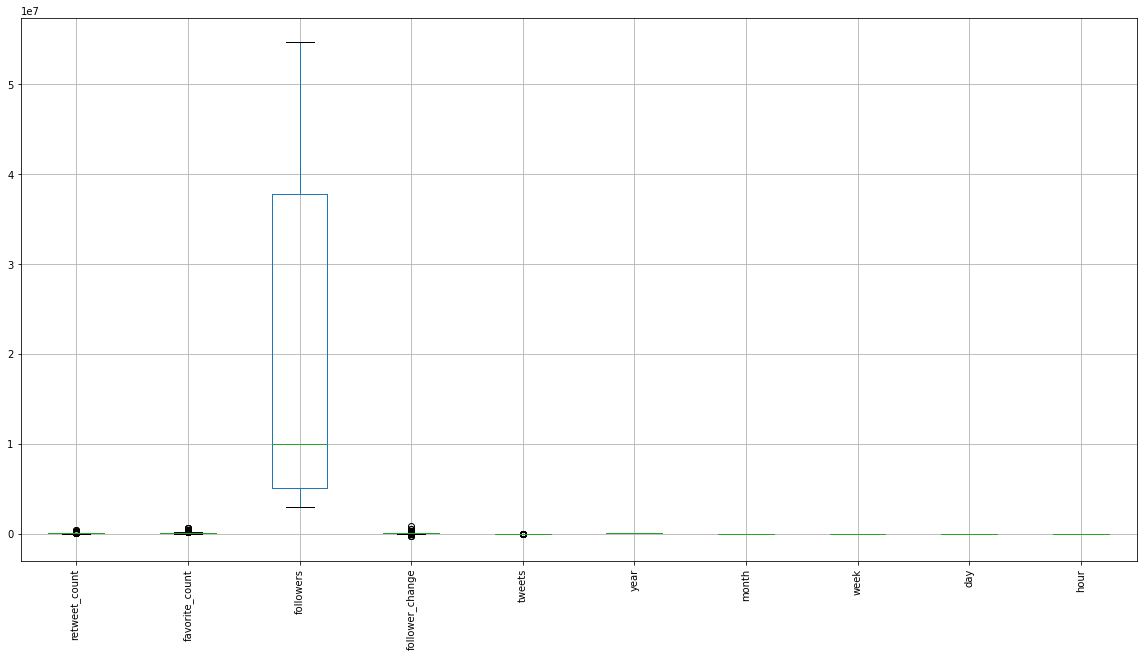

In [25]:
box_plot_1 = df_not_null.boxplot(rot=90, figsize=(20,10))

### Valores Atípicos

- IQR = Q3 - Q1
- q < Q1 - 1.5 * IQR
- q > Q3 + 1.5 * IQR

In [26]:
array_not_null = df_not_null.to_numpy()
array_statistics = df_statistics.to_numpy()

In [27]:
size_array_not_null = array_not_null.shape

In [28]:
rows = size_array_not_null[0]
columns = size_array_not_null[1]

In [29]:
for i in range(columns - 1):
    for j in range(rows):
        q1 = array_statistics[4][i]
        q3 = array_statistics[6][i]
        iqr = q3 - q1
        left_most = q1 - (1.5 * iqr)
        right_most = q3 + (1.5 * iqr)
        if(array_not_null[j][i + 1] < left_most):
            array_not_null[j][i + 1] = array_statistics[1][i]
        if(array_not_null[j][i + 1] > right_most):
            array_not_null[j][i + 1] = array_statistics[1][i]

In [30]:
names_cols = df_not_null.columns.values
data_without_outliers = pd.DataFrame.from_records(array_not_null, columns = names_cols)
df_mean = data_without_outliers.describe()

In [31]:
df_mean

,retweet_count,favorite_count,followers,follower_change,tweets,year,month,week,day,hour
count,11759.000000,11759.000000,1.175900e+04,11751.000000,11641.000000,11759.000000,11759.000000,11759.000000,11759.000000,11159.000000
mean,9639.460683,38335.220623,2.002753e+07,28113.622630,13.635967,2016.246875,7.017604,28.794200,16.127307,13.375213
std,9218.372678,40500.707305,1.858377e+07,20324.261956,8.057694,1.066680,3.237644,14.067874,8.823738,6.600350
min,6.000000,34.000000,2.957264e+06,-34939.000000,-4.000000,2015.000000,1.000000,1.000000,1.000000,1.000000
25%,1516.000000,3727.000000,5.033780e+06,12735.000000,7.000000,2015.000000,5.000000,18.000000,8.000000,10.000000
50%,6806.000000,19503.000000,9.941948e+06,22194.000000,13.000000,2016.000000,7.000000,30.000000,17.000000,14.000000
75%,15690.500000,68667.000000,3.780345e+07,37173.000000,17.000000,2017.000000,10.000000,41.000000,24.000000,19.000000
max,38805.000000,170619.000000,5.467247e+07,92050.000000,39.000000,2018.000000,12.000000,53.000000,31.000000,23.000000


### Diagrama de Caja de Bigotes #2 (Sin datos atípicos y con valores nulos)

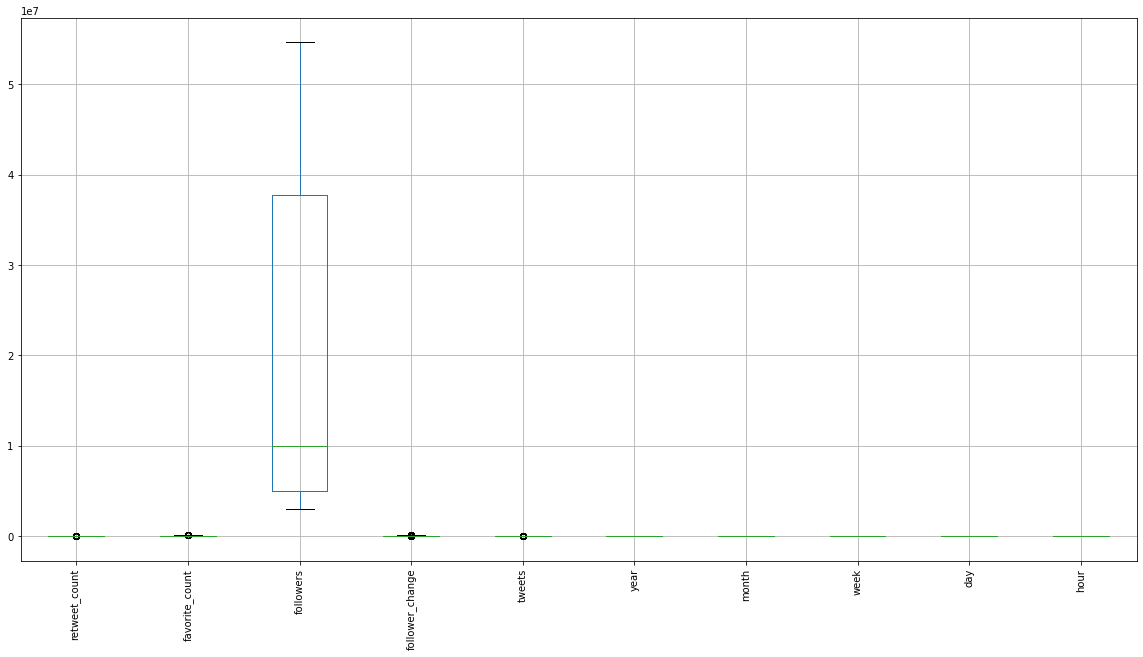

In [32]:
box_plot_2 = data_without_outliers.boxplot(rot=90, figsize=(20,10))

### Valores Nulos

In [33]:
data = data_without_outliers
array_data = data.to_numpy()
array_mean = df_mean.to_numpy()

In [34]:
size_array_data = array_data.shape

In [35]:
rows_2 = size_array_data[0]
columns_2 = size_array_data[1]

In [36]:
for i in range(columns_2 - 1):
    for j in range(rows_2):
        if(np.math.isnan(array_data[j][i + 1])):
            array_data[j][i+1] = array_mean[1][i]

In [37]:
names_cols_2 = data_without_outliers.columns.values
data_next = pd.DataFrame.from_records(array_data, columns = names_cols_2)
df_nulls = data_next.describe()

In [38]:
df_nulls

,retweet_count,favorite_count,followers,follower_change,tweets,year,month,week,day,hour
count,11759.000000,11759.000000,1.175900e+04,11759.00000,11759.000000,11759.000000,11759.000000,11759.000000,11759.000000,11759.000000
mean,9639.460683,38335.220623,2.002753e+07,28113.62263,13.635967,2016.246875,7.017604,28.794200,16.127307,13.375213
std,9218.372678,40500.707305,1.858377e+07,20317.34659,8.017160,1.066680,3.237644,14.067874,8.823738,6.429740
min,6.000000,34.000000,2.957264e+06,-34939.00000,-4.000000,2015.000000,1.000000,1.000000,1.000000,1.000000
25%,1516.000000,3727.000000,5.033780e+06,12735.00000,7.000000,2015.000000,5.000000,18.000000,8.000000,11.000000
50%,6806.000000,19503.000000,9.941948e+06,22202.00000,13.000000,2016.000000,7.000000,30.000000,17.000000,13.375213
75%,15690.500000,68667.000000,3.780345e+07,37173.00000,17.000000,2017.000000,10.000000,41.000000,24.000000,19.000000
max,38805.000000,170619.000000,5.467247e+07,92050.00000,39.000000,2018.000000,12.000000,53.000000,31.000000,23.000000


### Diagrama de Caja de Bigotes #3 (Sin datos atípicos y sin valores nulos)

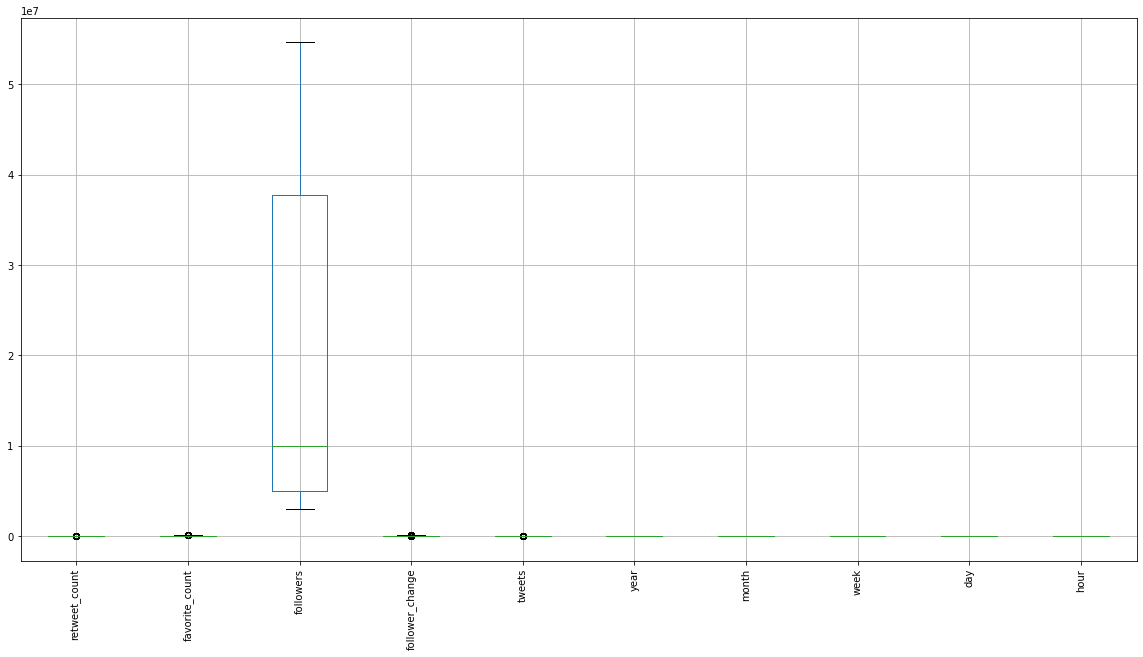

In [39]:
box_plot_3 = data_next.boxplot(rot=90, figsize=(20,10))

### PCA (Análisis de Componentes Principales)